In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import numpy as np
from tools import mape
import json

# 分析单变量预测结果

In [2]:
restult_json_list = []
restult_predictimage_list = []
result_path_list = []
for root,dirs,files in os.walk('tuning_w48//'):
    for f in files:
        if ("log.json" == f):
            restult_json_list.append(os.path.join(root,f))
        if ("standard_predict.jpg" == f):
            restult_predictimage_list.append(os.path.join(root,f))
            result_path_list.append(root)
restult_predictimage_list.sort()
restult_json_list.sort()
result_path_list.sort()
len(restult_predictimage_list)
restult_json_list


['tuning_w48//ANN_Aggregate/log.json',
 'tuning_w48//ANN_Appliance1/log.json',
 'tuning_w48//ANN_Appliance2/log.json',
 'tuning_w48//ANN_Appliance3/log.json',
 'tuning_w48//ANN_Appliance4/log.json',
 'tuning_w48//ANN_Appliance5/log.json',
 'tuning_w48//ANN_Appliance6/log.json',
 'tuning_w48//ANN_Appliance7/log.json',
 'tuning_w48//ANN_Appliance8/log.json',
 'tuning_w48//ANN_Appliance9/log.json',
 'tuning_w48//LSTM_Aggregate/log.json',
 'tuning_w48//LSTM_Appliance1/log.json',
 'tuning_w48//LSTM_Appliance2/log.json',
 'tuning_w48//LSTM_Appliance3/log.json',
 'tuning_w48//LSTM_Appliance4/log.json',
 'tuning_w48//LSTM_Appliance5/log.json',
 'tuning_w48//LSTM_Appliance6/log.json',
 'tuning_w48//LSTM_Appliance7/log.json',
 'tuning_w48//LSTM_Appliance8/log.json',
 'tuning_w48//LSTM_Appliance9/log.json',
 'tuning_w48//TCN_Aggregate/log.json',
 'tuning_w48//TCN_Appliance1/log.json',
 'tuning_w48//TCN_Appliance2/log.json',
 'tuning_w48//TCN_Appliance3/log.json',
 'tuning_w48//TCN_Appliance4/log.

In [3]:
data = {"M":["rmse","mse","mae","mape"]}
inv_data = {"M":["rmse","mse","mae","mape"]}
for i in range(len(restult_json_list)):
    with open(restult_json_list[i], 'r') as f:
        log_dic = json.load(f)
        print(log_dic["data"]["target"])
        print("early stop in: ",log_dic["traing"]["early_stop"])
        print("the final train loss is: ", log_dic["traing"]["final_train_loss"])
        print("standard:")
        print([(k,round(v,3)) for k, v in log_dic["testing"]["standard"].items()])
        data[log_dic["model"]["name"]+log_dic["data"]["target"]] = [round(v,3) for k, v in log_dic["testing"]["standard"].items()]
        print("inverse")
        print([(k,round(v,3)) for k, v in log_dic["testing"]["inverse"].items()])
        inv_data[log_dic["model"]["name"]+log_dic["data"]["target"]] = [round(v,3) for k, v in log_dic["testing"]["inverse"].items()]
    print()
pd.DataFrame(data).to_csv("metric.csv")
pd.DataFrame(inv_data).to_csv("inv_metric.csv")

Aggregate
early stop in:  53
the final train loss is:  0.257
standard:
[('rmse', 0.478), ('mse', 0.229), ('mae', 0.173), ('mape', 107.595)]
inverse
[('rmse', 380.211), ('mse', 144560.706), ('mae', 137.361), ('mape', 38.143)]

Appliance1
early stop in:  34
the final train loss is:  0.116
standard:
[('rmse', 0.293), ('mse', 0.086), ('mae', 0.052), ('mape', 12.752)]
inverse
[('rmse', 9.573), ('mse', 91.633), ('mae', 1.694), ('mape', inf)]

Appliance2
early stop in:  44
the final train loss is:  0.183
standard:
[('rmse', 0.41), ('mse', 0.168), ('mae', 0.122), ('mape', 20.559)]
inverse
[('rmse', 9.576), ('mse', 91.692), ('mae', 2.848), ('mape', inf)]

Appliance3
early stop in:  25
the final train loss is:  0.103
standard:
[('rmse', 0.322), ('mse', 0.104), ('mae', 0.077), ('mape', 18.094)]
inverse
[('rmse', 11.724), ('mse', 137.457), ('mae', 2.788), ('mape', inf)]

Appliance4
early stop in:  20
the final train loss is:  0.546
standard:
[('rmse', 0.299), ('mse', 0.089), ('mae', 0.113), ('mape

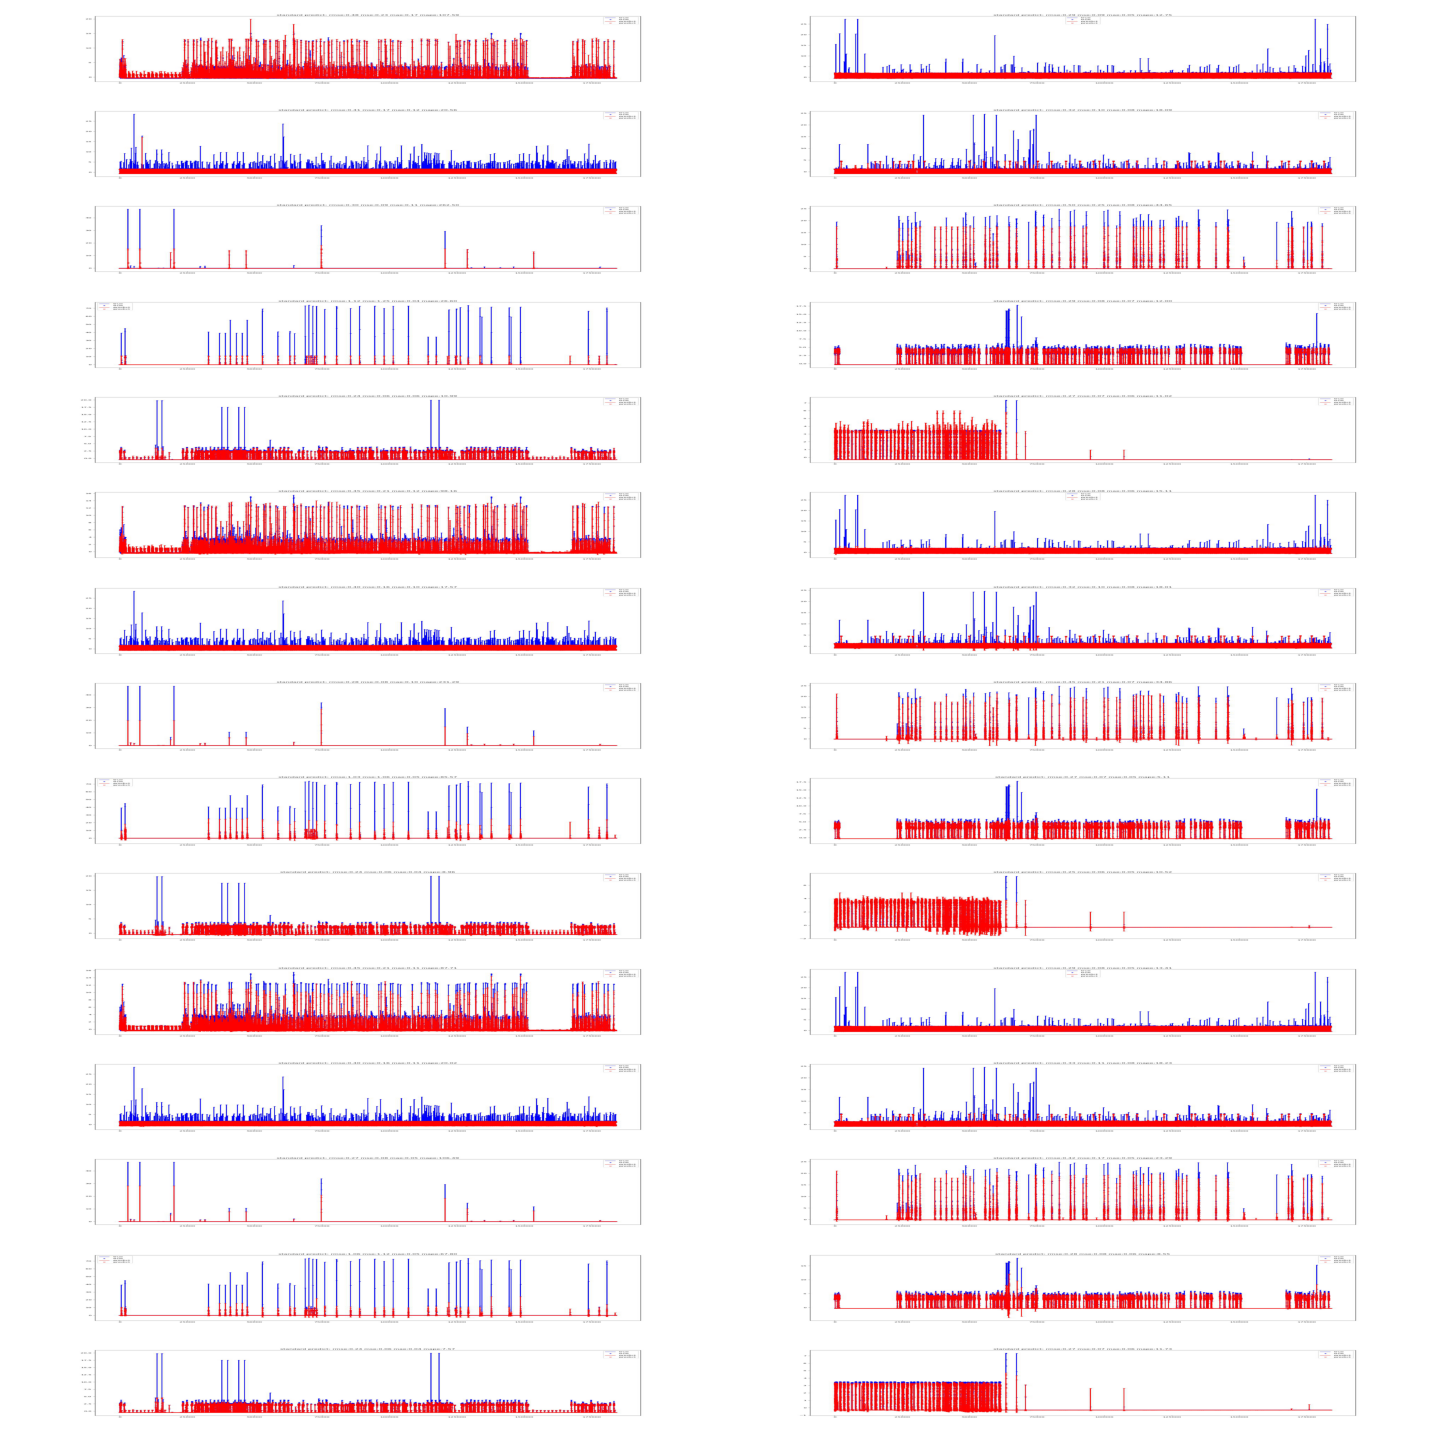

In [4]:
plt.figure(figsize=(20,20))

for i in range(len(restult_predictimage_list)):

    img = plt.imread(restult_predictimage_list[i], format=None)
    plt.subplot(int(len(restult_predictimage_list)/2),2,i+1)
    plt.title(restult_predictimage_list[i].split("/" )[1])
    plt.imshow(img, aspect='auto' )
    plt.axis("off")
    plt.tight_layout() #调整大小间距
    

In [5]:
test_predicts_inv_list = []
test_true_inv_list = []
df_test_metrics_list = []

for i in range(len(result_path_list)):
    predicts = pd.read_csv(os.path.join(result_path_list[i], "predicts.csv"))
    test_predicts_inv_list.append(predicts["test_predicts"].values)
    test_true_inv_list.append(predicts["test_trues"].values)
    
    df_test_metrics = pd.read_csv(os.path.join(result_path_list[i],"test_metrics.csv"))
    df_test_metrics_list.append(df_test_metrics["standard"].values)


In [ ]:
i = 0
rmse_b, mse_b, mae_b, mape_b = df_test_metrics_list[i]
test_trues_inv = test_true_inv_list[0][51200:52200]
test_predicts_inv = test_predicts_inv_list[0][51200:52200]

plt.figure(figsize=(20,10))
# plt.title("inverse predict: rmse:{:.2f} mse:{:.2f} mae:{:.2f} mape:{:.2f}".format(rmse_b, mse_b, mae_b, mape_b))
plt.plot(test_trues_inv,'b', label="true")
plt.plot(test_trues_inv,'bo', markersize=3, label="true")
plt.plot(test_predicts_inv,'r', label='predict')
plt.plot(test_predicts_inv,'rx', markersize=5, label='predict')
plt.legend(loc='best')
plt.show()

# Loss 图

In [71]:
train_loss_image_path_list = []
json_path_list = []
for root, _, files in os.walk("tuning_w48"):
    for f in files:
        if "train_loss" in f:
            train_loss_image_path_list.append(os.path.join(root, f))
        if "json" in f:
            json_path_list.append(os.path.join(root, f))

json_path_list.sort()
train_loss_image_path_list.sort()

In [72]:
json_path_list

['tuning_w48/ANN_Aggregate/log.json',
 'tuning_w48/ANN_Appliance1/log.json',
 'tuning_w48/ANN_Appliance2/log.json',
 'tuning_w48/ANN_Appliance3/log.json',
 'tuning_w48/ANN_Appliance4/log.json',
 'tuning_w48/ANN_Appliance5/log.json',
 'tuning_w48/ANN_Appliance6/log.json',
 'tuning_w48/ANN_Appliance7/log.json',
 'tuning_w48/ANN_Appliance8/log.json',
 'tuning_w48/ANN_Appliance9/log.json',
 'tuning_w48/LSTM_Aggregate/log.json',
 'tuning_w48/LSTM_Appliance1/log.json',
 'tuning_w48/LSTM_Appliance2/log.json',
 'tuning_w48/LSTM_Appliance3/log.json',
 'tuning_w48/LSTM_Appliance4/log.json',
 'tuning_w48/LSTM_Appliance5/log.json',
 'tuning_w48/LSTM_Appliance6/log.json',
 'tuning_w48/LSTM_Appliance7/log.json',
 'tuning_w48/LSTM_Appliance8/log.json',
 'tuning_w48/LSTM_Appliance9/log.json',
 'tuning_w48/TCN_Aggregate/log.json',
 'tuning_w48/TCN_Appliance1/log.json',
 'tuning_w48/TCN_Appliance2/log.json',
 'tuning_w48/TCN_Appliance3/log.json',
 'tuning_w48/TCN_Appliance4/log.json',
 'tuning_w48/TCN_A

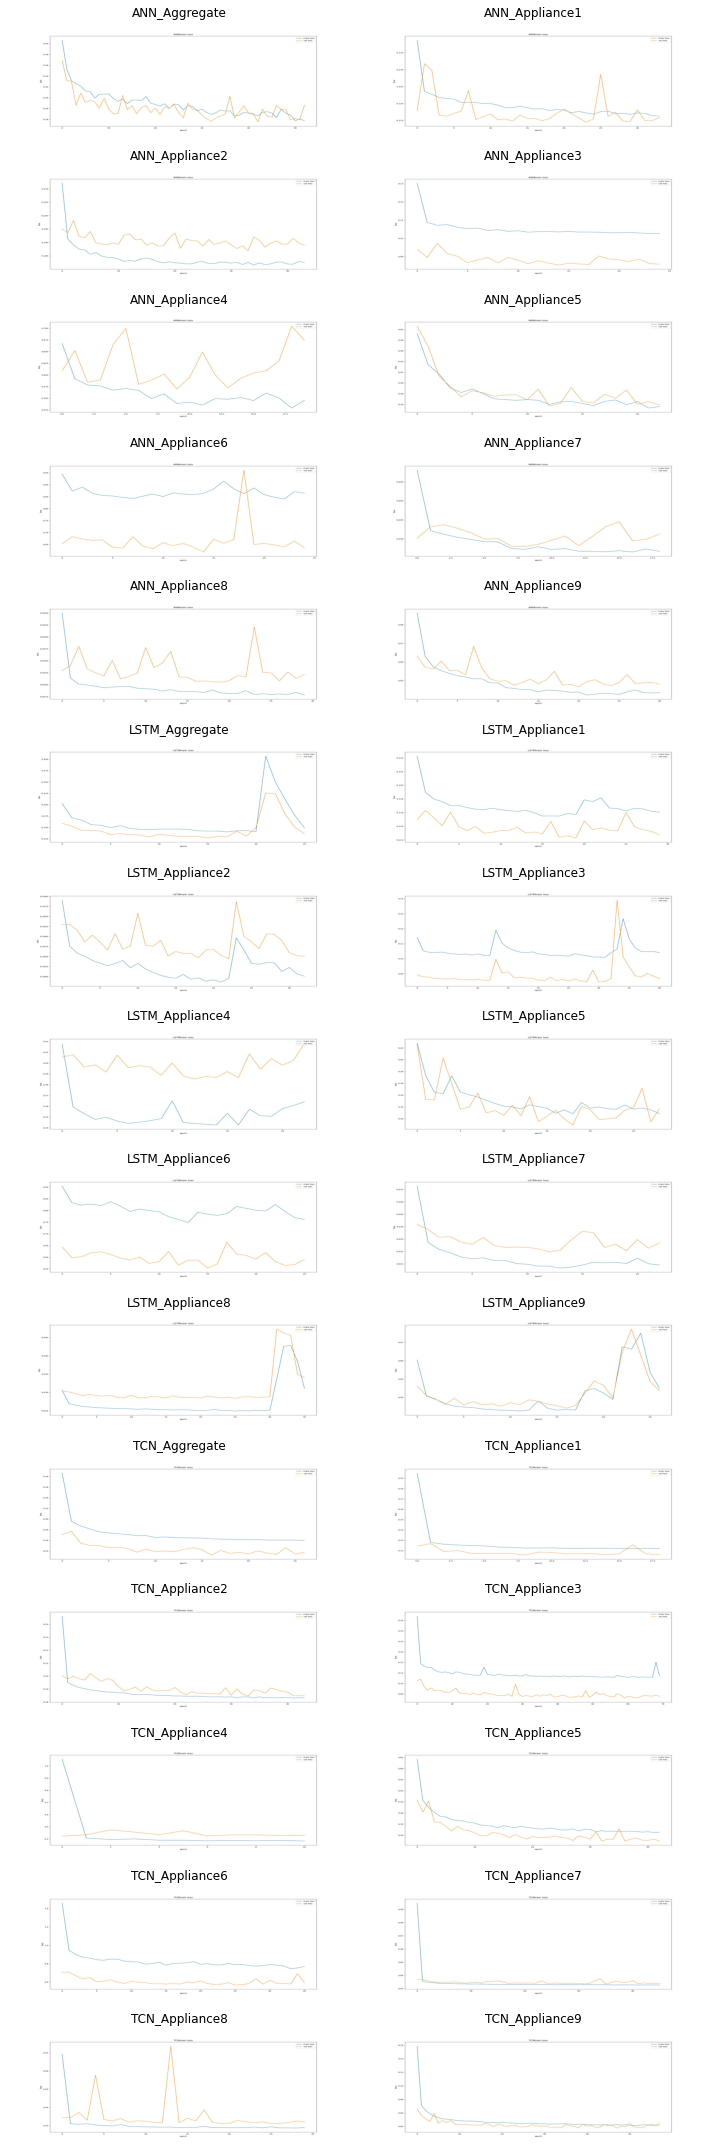

In [70]:
plt.figure(figsize=(10,30))

for i in range(len(train_loss_image_path_list)):

    img = plt.imread(train_loss_image_path_list[i], format=None)
    plt.subplot(int(len(train_loss_image_path_list)/2),2,i+1)
    plt.title(train_loss_image_path_list[i].split("/" )[1])
    plt.imshow(img, aspect='auto' )
    plt.axis("off")
    plt.tight_layout() #调整大小间距

# 预测模型对比图

In [55]:
# 获取路径
restult_predict_list = []
restult_test_metrics_list = []
for root,dirs,files in os.walk('tuning_w48//'):
    for f in files:
        if ("test_metrics.csv" == f and "Appliance8" in root):
            restult_test_metrics_list.append(os.path.join(root,f))
        if ("predicts.csv" == f and "Appliance8" in root):
            restult_predict_list.append(os.path.join(root,f))
len(restult_test_metrics_list)

3

In [56]:
# 规范顺序
t = ["","",""]
for i in restult_predict_list:
    if "ANN" in i:
        t[0] = i
    elif "TCN" in i:
        t[1] = i
    else:
        t[2] = i
restult_predict_list = t

In [57]:
## 读取预测数据
test_predicts_inv_list = []
test_true_inv_list = []
df_test_metrics_list = []

for i in range(len(restult_predict_list)):
    predicts = pd.read_csv(restult_predict_list[i])
    
    test_predicts_inv_list.append(predicts["test_predicts"].values)
    test_true_inv_list.append(predicts["test_trues"].values)


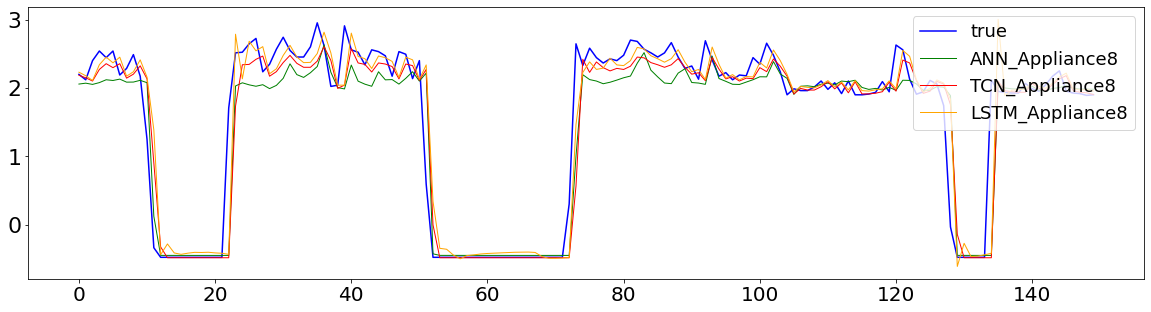

In [60]:
# 局部区域分析图
# segment = [-136000,-135200] #w48 Aggregate
# segment = [-135880,-135820] #w48 Aggregate 1
# segment = [-135800,-135750] #w48 Aggregate 3
# segment = [-135455,-135355] #w48 Aggregate 2

# segment = [-135600,-135200] #w48 Appliance1
# segment = [-145600,-145200] #w48 Appliance2
# segment = [-145600,-145300] #w48 Appliance3
# segment = [-135600,-135300] #w48 Appliance4 ×
# segment = [-152430,-152320] #w48 Appliance5
# segment = [-124730,-110230] #w48 Appliance6
# segment = [-149400,-149250] #w48 Appliance7
segment = [-149400,-149250] #w48 Appliance8
# segment = [-148920,-148800] #w48 Appliance9



plt.figure(figsize=(20,5))
plt.plot(test_true_inv_list[0][segment[0]:segment[1]],'b', label="true")

color = ["g","r","orange"]
for i in range(len(test_predicts_inv_list)):
    plt.plot(test_predicts_inv_list[i][segment[0]:segment[1]],color=color[i],linewidth=1.0, label=restult_predict_list[i].split("/")[-2])
plt.rc('legend', fontsize=18)
plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 22
plt.legend(loc='upper right')
plt.show()